Importando as bibliotecas que utilizarei para o projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando o data Set e visualizando as primeiras linhas com head

In [12]:
df = pd.read_csv('Parkinsons-Telemonitoring-ucirvine.csv')

print(df.head())

   subject  age    sex  test_time  motor_updrs  total_updrs   jitter  \
0        1   72  False     5.6431       28.199       34.398  0.00662   
1        1   72  False    12.6660       28.447       34.894  0.00300   
2        1   72  False    19.6810       28.695       35.389  0.00481   
3        1   72  False    25.6470       28.905       35.810  0.00528   
4        1   72  False    33.6420       29.187       36.375  0.00335   

   jitter_abs  jitter_rap  jitter_ppq5  ...  shimmer_db  shimmer_apq3  \
0    0.000034     0.00401      0.00317  ...       0.230       0.01438   
1    0.000017     0.00132      0.00150  ...       0.179       0.00994   
2    0.000025     0.00205      0.00208  ...       0.181       0.00734   
3    0.000027     0.00191      0.00264  ...       0.327       0.01106   
4    0.000020     0.00093      0.00130  ...       0.176       0.00679   

   shimmer_apq5  shimmer_apq11  shimmer_dda       nhr     hnr     rpde  \
0       0.01309        0.01662      0.04314  0.014290 

In [47]:
num_ids_diferentes = df['subject'].nunique()
print(f"Quantidade de IDs diferentes: {num_ids_diferentes}")


Quantidade de IDs diferentes: 42


Grafico de "Montanha" que mostra quantas pessoas estão em cada faixa de idade:

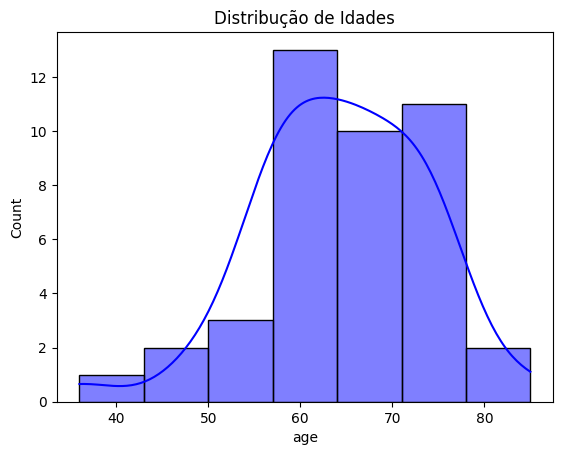

In [6]:
df_unique = df.drop_duplicates(subset='subject')

sns.histplot(df_unique['age'], kde=True, color='blue')
plt.title('Distribução de Idades')
plt.show()

Gênero: Grafico para analisarmos a distribuição de genero no estudo

C:\Users\AndersonSilva\AppData\Local\Temp\ipykernel_9936\688223742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_unique, palette='pastel')


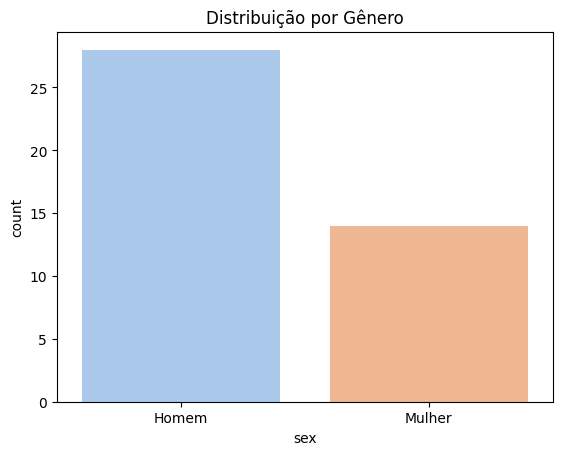

In [7]:
sns.countplot(x='sex', data=df_unique, palette='pastel')
plt.title('Distribuição por Gênero')
plt.xticks(ticks=[0, 1], labels=['Homem', 'Mulher'])
plt.show()


Será que idade gênero afetam a gravidade dos sintomas?

Valores únicos antes da conversão: ['Homem' 'Mulher']
Tipo de dado de 'sex': object
Valores únicos após a conversão: ['Homem' 'Mulher']


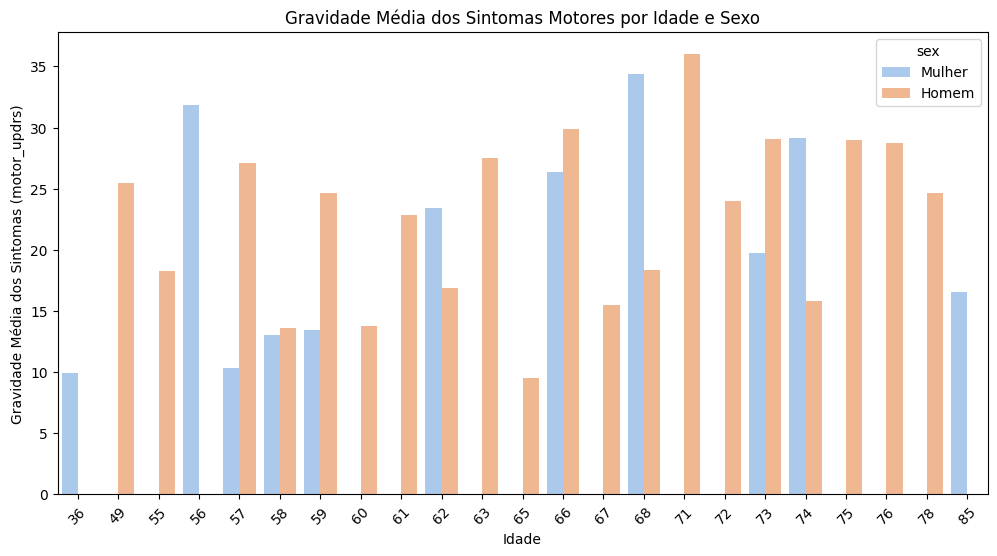

In [29]:

# 🛠️ Passo 2: Limpar o nome das colunas, removendo espaços extras
df.columns = df.columns.str.strip()  # Remove espaços antes e depois dos nomes das colunas

# 🛠️ Passo 3: Verificar os valores únicos da coluna 'sex'
print("Valores únicos antes da conversão:", df['sex'].unique())
print("Tipo de dado de 'sex':", df['sex'].dtype)

# 🛠️ Passo 4: Corrigir a coluna 'sex' para garantir que tenha apenas 'Homem' ou 'Mulher'
# ⚠️ Aqui fazemos um tratamento para qualquer formato que a coluna tenha
df['sex'] = df['sex'].replace({0: 'Homem', 1: 'Mulher', '0': 'Homem', '1': 'Mulher', True: 'Mulher', False: 'Homem'})

# 🛠️ Passo 5: Verificar novamente os valores únicos da coluna 'sex'
print("Valores únicos após a conversão:", df['sex'].unique())

# 🛠️ Passo 6: Agrupar os dados para o gráfico
df_grouped = df.groupby(['subject', 'age', 'sex'])['motor_updrs'].mean().reset_index()

# 🛠️ Passo 7: Agrupar para o gráfico de barras
df_barras = df_grouped.groupby(['age', 'sex'])['motor_updrs'].mean().reset_index()

# 🛠️ Passo 8: Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='motor_updrs', hue='sex', data=df_barras, palette='pastel')

plt.title('Gravidade Média dos Sintomas Motores por Idade e Sexo')
plt.xlabel('Idade')
plt.ylabel('Gravidade Média dos Sintomas (motor_updrs)')
plt.xticks(rotation=45)  # Rotacionar as idades para melhor leitura
plt.show()


Slide 5: O que influencia os sintomas?
"Será que idade e gênero afetam a gravidade dos sintomas?"

1️⃣ Idade x motor_UPDRS (escore numérico que mede a gravidade dos sintomas motores de Parkinson.)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='motor_updrs', data=df, hue='sex_label', palette='pastel')
plt.title('Relação entre Idade e Gravidade dos sintomas motores')
plt.xlabel('Idade')
plt.ylabel('Gravidade dos Sintomas (motor_updrs)')
plt.show()


D:\Nova pasta (2)\ipykernel_7044\967765155.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_avg = df.groupby(['age_group', 'sex_label'])['motor_updrs'].mean().reset_index()


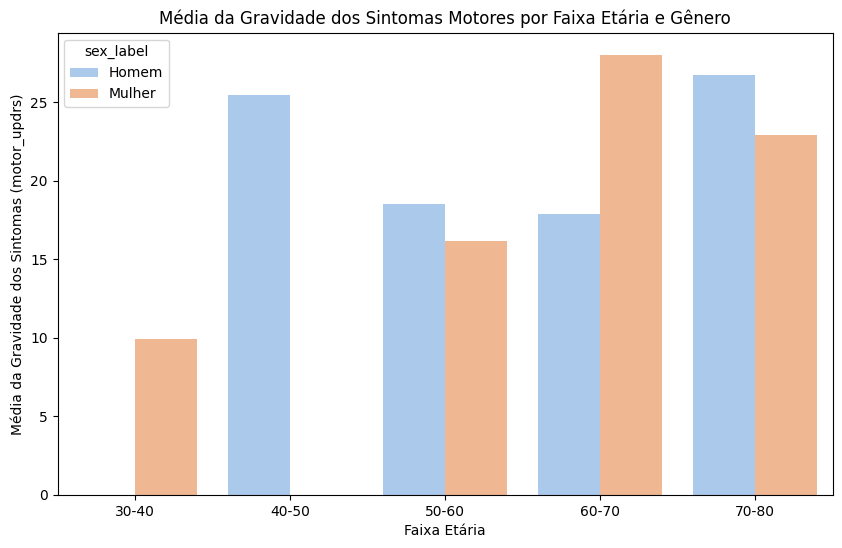

In [41]:

# Criar faixas etárias
df['age_group'] = pd.cut(df['age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Calcular a média de 'motor_updrs' por faixa etária e gênero
age_gender_avg = df.groupby(['age_group', 'sex_label'])['motor_updrs'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='motor_updrs', hue='sex_label', data=age_gender_avg, palette='pastel')
plt.title('Média da Gravidade dos Sintomas Motores por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Média da Gravidade dos Sintomas (motor_updrs)')
plt.show()


Slide 6: Será que idade e gênero afetam o total_UPDRS (escore numérico que mede a gravidade geral dos sintomas (motores + não motores))?

D:\Nova pasta (2)\ipykernel_7044\1945194286.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_avg = df.groupby(['age_group', 'sex_label'])['total_updrs'].mean().reset_index()


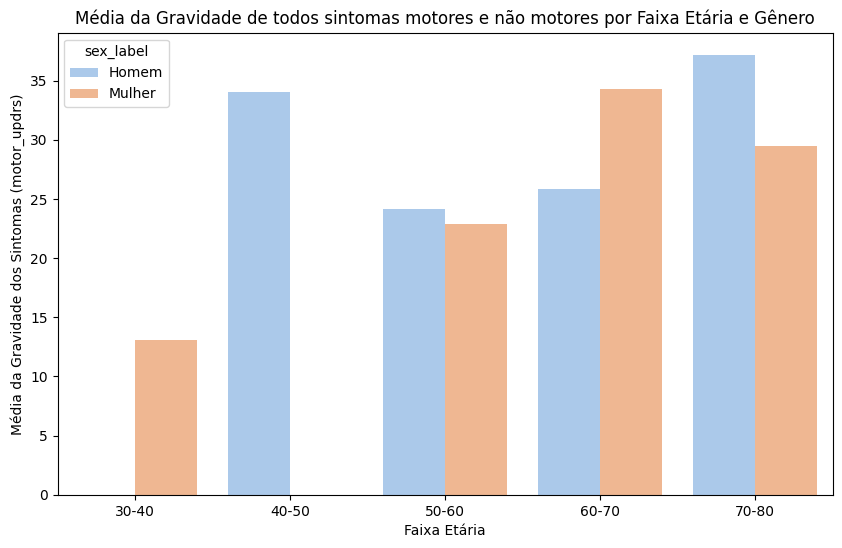

In [44]:
# Criar faixas etárias
df['age_group'] = pd.cut(df['age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Calcular a média de 'motor_updrs' por faixa etária e gênero
age_gender_avg = df.groupby(['age_group', 'sex_label'])['total_updrs'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_updrs', hue='sex_label', data=age_gender_avg, palette='pastel')
plt.title('Média da Gravidade de todos sintomas motores e não motores por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Média da Gravidade dos Sintomas (motor_updrs)')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='total_updrs', data=df, hue='sex_label', palette='cool')
plt.title('Relação entre Idade e total_updrs')
plt.xlabel('Idade')
plt.ylabel('Gravidade Geral dos Sintomas (total_UPDRS)')
plt.show()


Idade media dos pacientes

In [11]:
media = df['age'].mean()
print(f'Média:{media}')

Média:64.80493617021277
